<a href="https://colab.research.google.com/github/PretomGhosh/Telecom-Customer-Churn-analysis/blob/main/Telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
telecom_df = pd.read_csv('telecom_customer_churn.csv')
telecom_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


(Insight 1) which promotional offers are retaining customer for a long time?
To find this out, I assumed the product should be considered as being used long time if it has been used for at least 36 months or more

In [10]:
long_usage = telecom_df[(telecom_df['Tenure in Months']>=36)  & (telecom_df['Offer'] != 'None')]
offer_counts = long_usage['Offer'].value_counts()
offer_counts.head()

Offer B    824
Offer A    520
Offer C     79
Name: Offer, dtype: int64

So we saw that Offer B is retaining customers for a long time (i.e. at least 36 months or more)

(Insight 2) From which city less customers are buying our service?

In [11]:
city_usage_counts = telecom_df['City'].value_counts()
least_used_city = city_usage_counts.idxmin()
print(f"The city where less customers are using our service is: {least_used_city}")

The city where less customers are using our service is: Johannesburg


in Johannesburg, less customers are using our service

(Insight 3) From which city highest revenue is coming?

In [12]:
total_revenue_by_city = telecom_df.groupby('City')['Total Revenue'].sum()
print(f"Highest revenue is coming from {total_revenue_by_city.idxmax()} city")

Highest revenue is coming from Los Angeles city


So, Los Angeles city is earning the highest revenue

(Insight 4) which contract type is earning the most revenue?

In [13]:
total_revenue_by_contract = telecom_df.groupby('Contract')['Total Revenue'].sum()
print(f"Highest revenue is coming from {total_revenue_by_contract.idxmax()} contracts")

Highest revenue is coming from Two Year contracts


Two Year contracts are earning the highest revenue

(Insight 5) what is the most common reason for customer churning?

In [14]:
churned_customers = telecom_df[(telecom_df['Customer Status'] == 'Churned')]
churning_reasons = churned_customers['Churn Reason'].value_counts()
churning_reasons.head()

Competitor had better devices    313
Competitor made better offer     311
Attitude of support person       220
Don't know                       130
Competitor offered more data     117
Name: Churn Reason, dtype: int64

In [15]:
print(f"Most common churning reason is: {churning_reasons.idxmax()}")

Most common churning reason is: Competitor had better devices


Competitors had better devices, which is the most common reason for churning

(Insight 6) How many customers joined the company during the last quarter? How many customers joined?

In [17]:
customers_joined_last_quarter = telecom_df[(telecom_df['Tenure in Months'] <=3)]
print(f"Number of customers joined in the last quarter is: {customers_joined_last_quarter.shape[0]}")

Number of customers joined in the last quarter is: 1051


Total 1051 customers joined in the last quarter

(Insight 7) What is the customer profile for a customer that churned, joined, and stayed? Are they different?

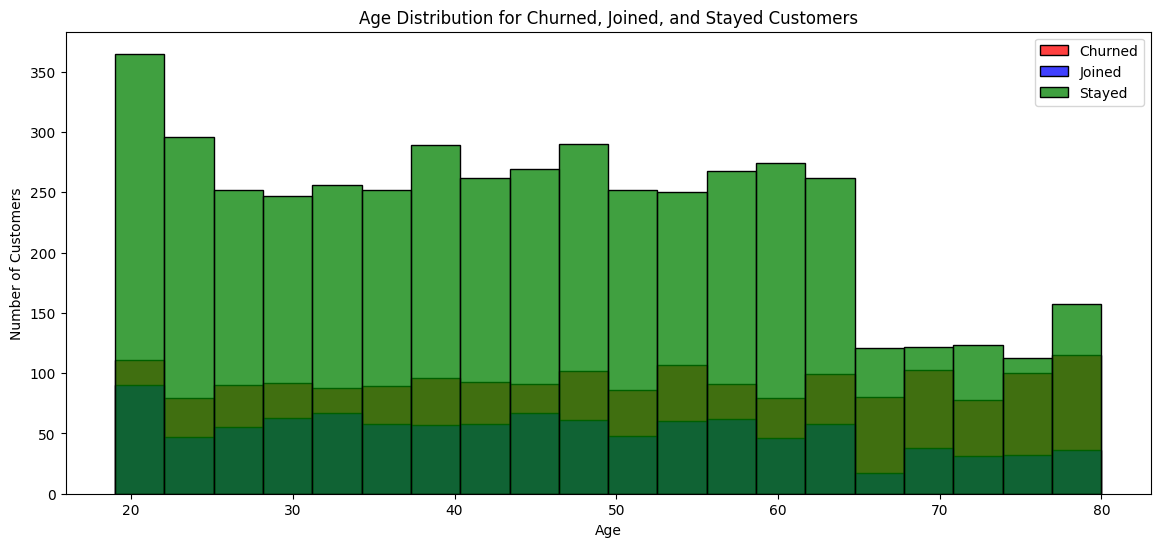

In [25]:
churned_customers = telecom_df[telecom_df['Customer Status'] == 'Churned']
joined_customers = telecom_df[telecom_df['Tenure in Months'] <= 3]  # This are the customers which have joined recently in the last quarter
stayed_customers = telecom_df[telecom_df['Customer Status'] == 'Stayed']

# Histogram for age distribution of churned, joined, and stayed customers
plt.figure(figsize=(14, 6))
sns.histplot(churned_customers['Age'], kde=False, bins=20, color='red', label='Churned')
sns.histplot(joined_customers['Age'], kde=False, bins=20, color='blue', label='Joined')
sns.histplot(stayed_customers['Age'], kde=False, bins=20, color='green', label='Stayed')
plt.title('Age Distribution for Churned, Joined, and Stayed Customers')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

Churned Customers: The red portion of the bars, representing churned customers, is consistently visible across all age groups, though it appears slightly more pronounced in the younger age brackets. This could suggest that younger customers are more prone to churn. However, the churn is not exclusive to the younger demographic, as it spans across all ages.

Joined Customers: The blue portion represents customers who have recently joined. It is less prominent compared to the stayed customers, indicating a smaller number of new customers across all age groups. The presence of new customers across the age spectrum suggests the services appeal to a wide demographic.

Stayed Customers: The green portion represents customers who have stayed with the company. This is the most significant segment across all age groups, which indicates a solid base of retained customers. The presence of stayed customers across all ages suggests a broad appeal of the company’s services.

Overall Trends: There is a visible trend of declining numbers of customers as age increases, which is typical in many industries. The largest concentration of customers seems to be in the 30-60 age range, which may represent the most targeted demographic for the company's services.

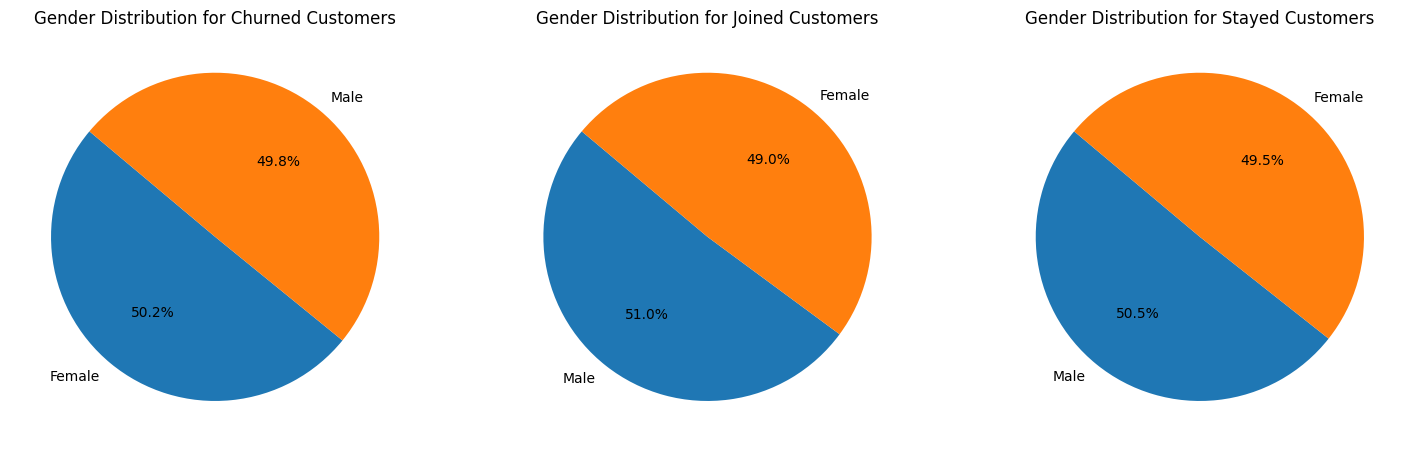

In [26]:
# Pie chart for gender distribution of churned, joined, and stayed customers
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].pie(churned_customers['Gender'].value_counts(), labels=churned_customers['Gender'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Gender Distribution for Churned Customers')
ax[1].pie(joined_customers['Gender'].value_counts(), labels=joined_customers['Gender'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Gender Distribution for Joined Customers')
ax[2].pie(stayed_customers['Gender'].value_counts(), labels=stayed_customers['Gender'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2].set_title('Gender Distribution for Stayed Customers')
plt.show()

Churned Customers: The pie chart for churned customers shows an almost even split between male (49.8%) and female (50.2%) customers. This suggests that gender does not play a significant role in customer churn for this company.

Joined Customers: Similarly, the pie chart for customers who have recently joined also shows a near-equal distribution with 49.0% male and 51.0% female. This indicates that the company's services are equally attractive to both genders in terms of acquiring new customers.

Stayed Customers: The distribution for customers who have stayed is again quite balanced, with 50.5% male and 49.5% female. The company has been successful in maintaining a gender-diverse customer base.

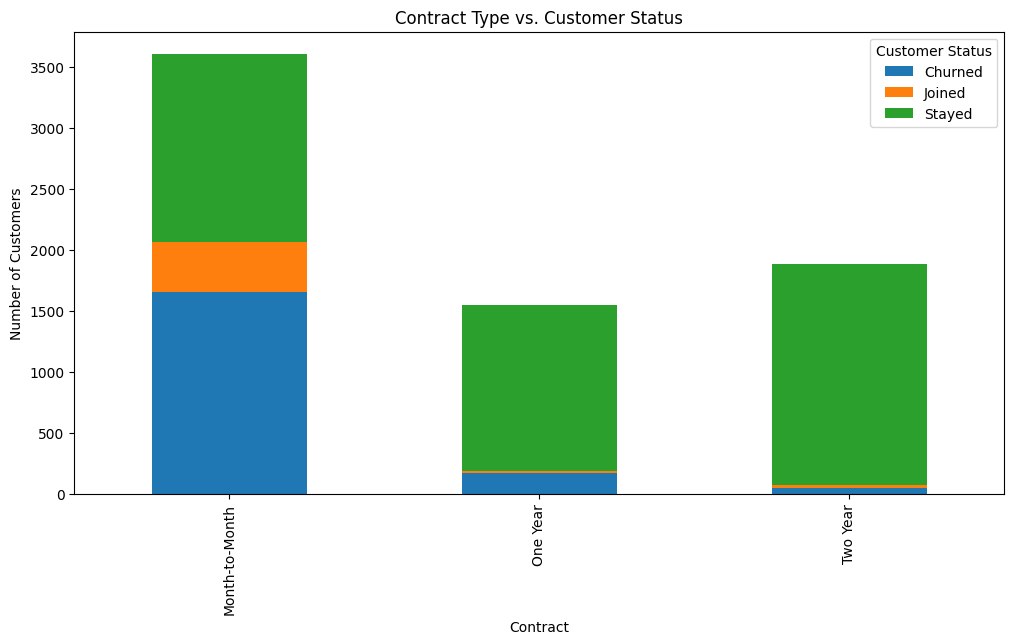

In [27]:
# Cross tabulation of Contract type and Customer Status
contract_status_ctab = pd.crosstab(telecom_df['Contract'], telecom_df['Customer Status'])
contract_status_ctab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Contract Type vs. Customer Status')
plt.ylabel('Number of Customers')
plt.show()

Month-to-Month Contracts: The majority of customers on month-to-month contracts have stayed with the company, which is represented by the green segment. However, this category also has the most significant proportion of churned customers (blue segment), suggesting a higher churn risk associated with monthly contracts.

One-Year Contracts: For one-year contracts, the green segment dominates, indicating a good retention rate. The very small blue and orange segments indicate low churn and joining rates, respectively, which might suggest that customers with one-year contracts are less likely to leave or that fewer new customers opt for this contract length.

Two-Year Contracts: The two-year contract shows the highest retention rate, with almost the entire bar being green and only very thin blue and orange lines at the bottom. This suggests that customers on two-year contracts are the least likely to churn and that the company successfully maintains long-term relationships with these customers.

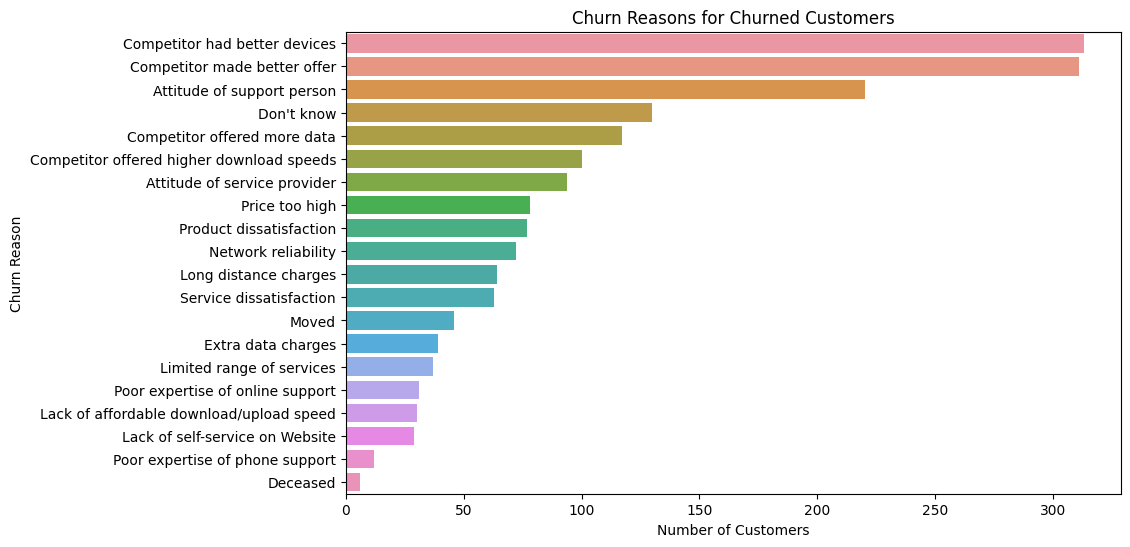

In [28]:
# Churn Reasons for Churned Customers
plt.figure(figsize=(10, 6))
sns.countplot(y='Churn Reason', data=churned_customers, order = churned_customers['Churn Reason'].value_counts().index)
plt.title('Churn Reasons for Churned Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Churn Reason')
plt.show()

Competitor Factors: The two most cited reasons for churn relate to competitors, specifically that they had better devices and made better offers. This suggests that competitive actions are a significant factor driving customers away.

Customer Service Issues: Attitudes of support personnel and service providers are also notable reasons for churn, which points to the importance of customer service in customer retention.

Service Quality and Pricing: Download speeds, data allowances, and pricing are other critical factors for churn. High prices, dissatisfaction with products, and network reliability issues have also led customers to leave, indicating that service quality and cost are areas for improvement.

Additional Fees: Charges for long-distance, extra data, and other services have contributed to customer churn, suggesting that customers are sensitive to additional costs and perceived value.

Other Reasons: A few customers have churned for reasons outside the company's control, such as moving or in the unfortunate event of the customer's death.

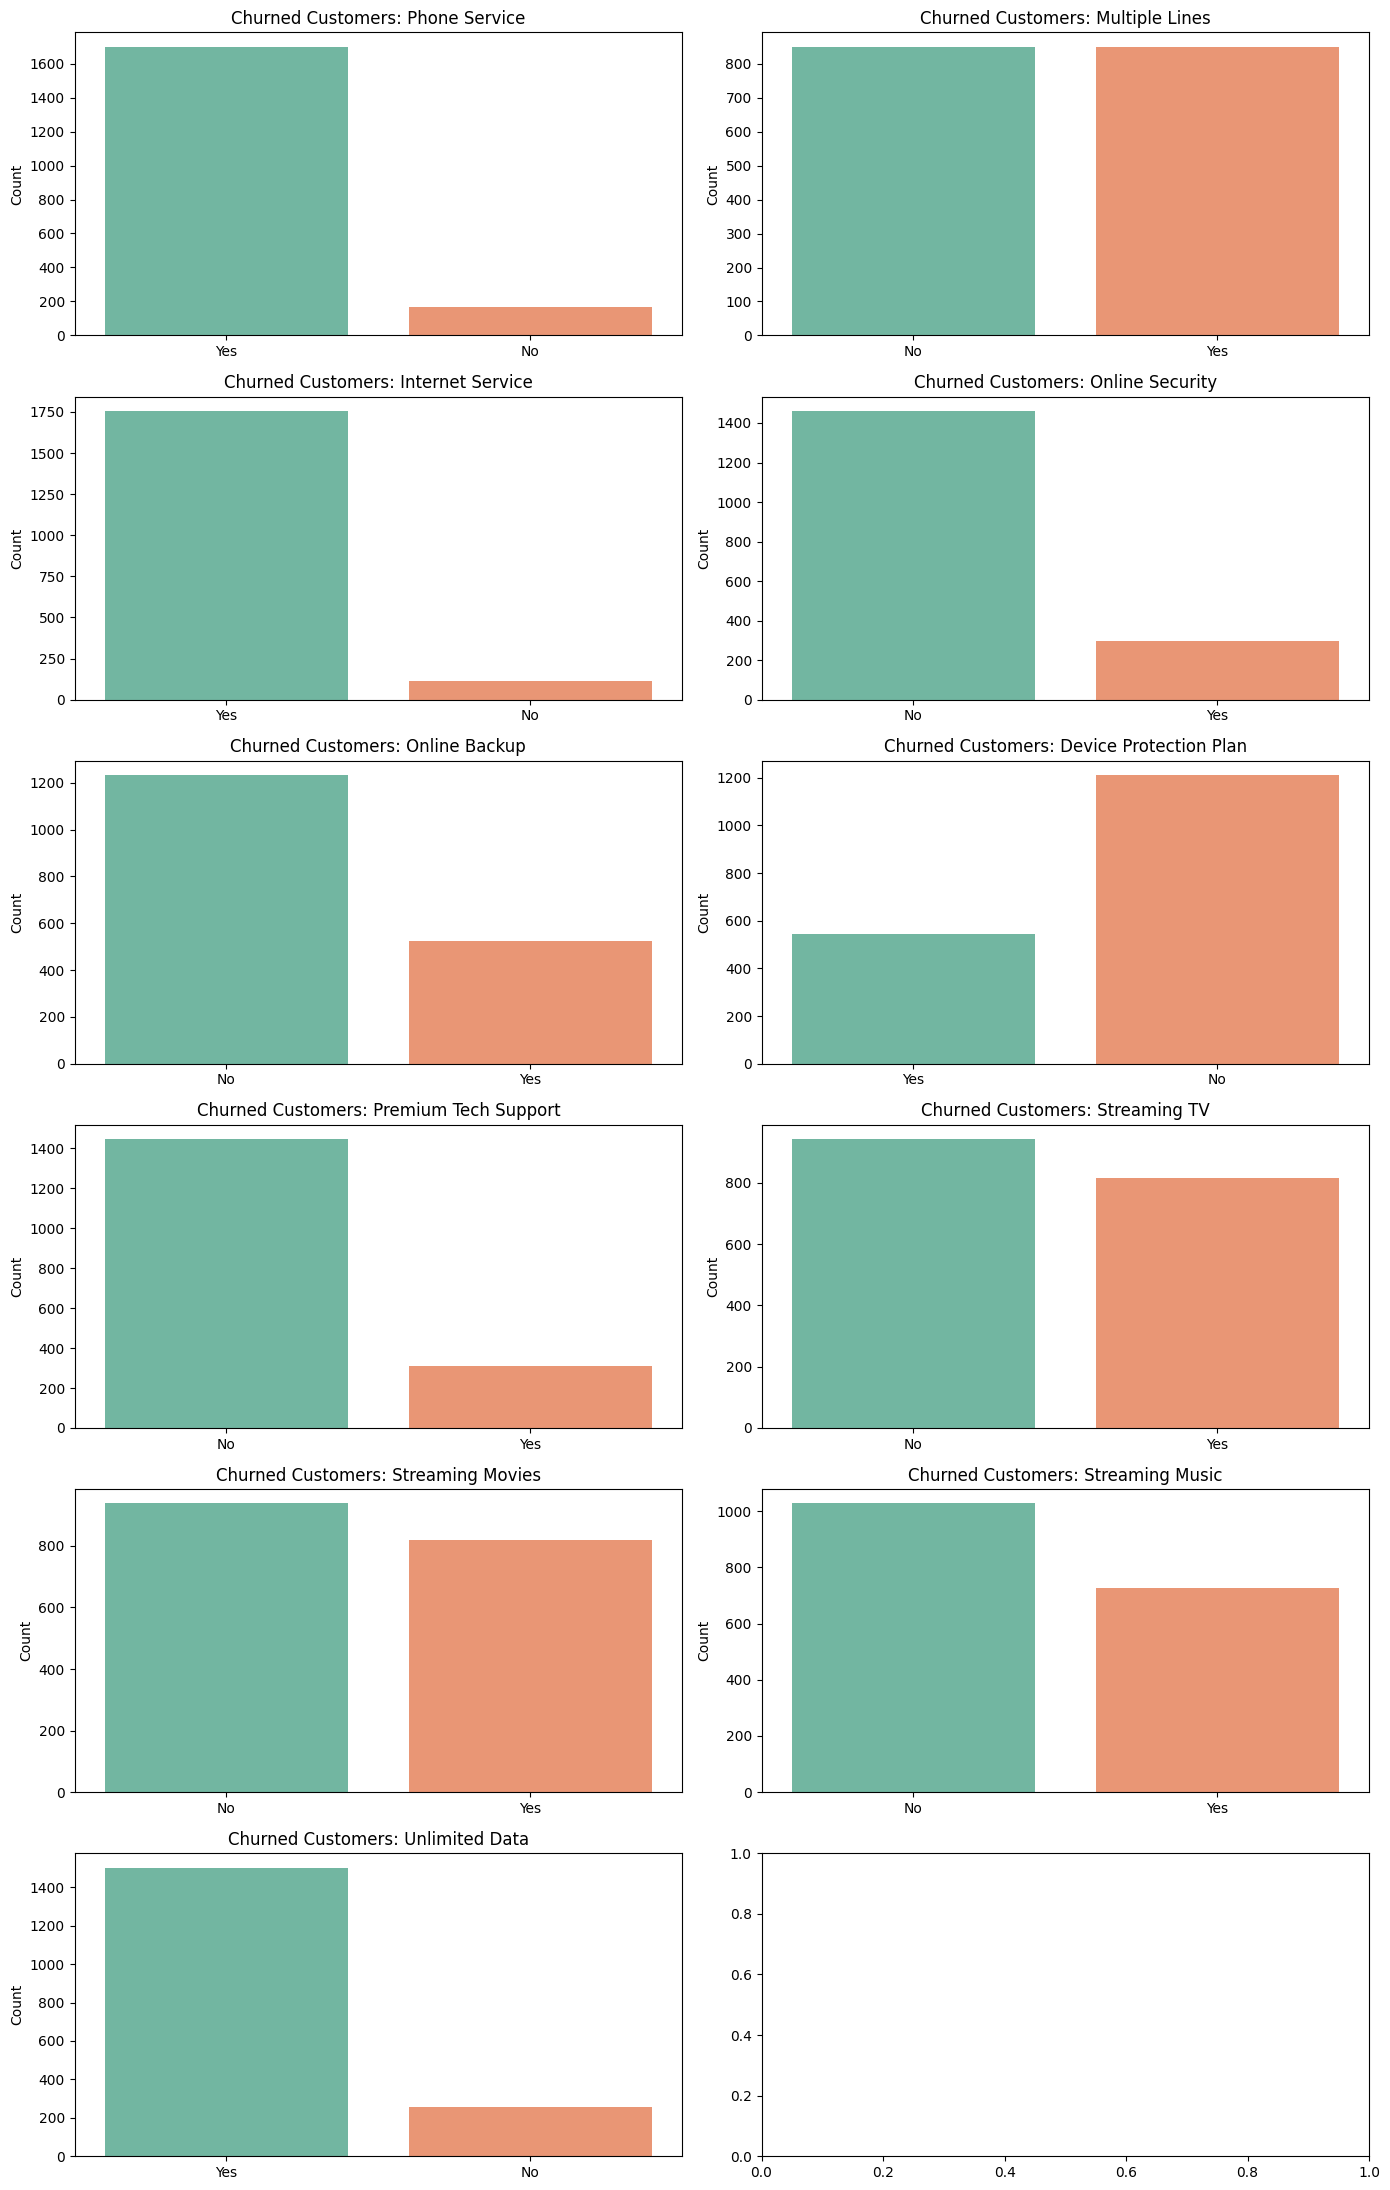

In [29]:
# Service usage for Churned Customers
services = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 22))
axes = axes.flatten()

for i, service in enumerate(services):
    if i < len(services):
        sns.countplot(x=service, data=churned_customers, ax=axes[i], palette='Set2')
        axes[i].set_title(f'Churned Customers: {service}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Phone Service: Almost all churned customers had phone service, suggesting that having a phone service alone is not sufficient to retain customers or that the reasons for churn are unrelated to the basic phone service.

Multiple Lines: There are more churned customers with no multiple lines than with multiple lines. This may indicate that customers with simpler needs or fewer services are more likely to churn.

Internet Service: A significant majority of churned customers had internet service. This could imply that internet service quality or pricing could be factors in customer churn.

Online Security: More churned customers did not have online security services than those who did. This might suggest that additional features like online security could influence customer retention.

Online Backup: Similar to online security, more churned customers lacked online backup services.

Device Protection Plan: More churned customers did not have a device protection plan, which could indicate that customers without this feature might feel less tied to the provider.

Premium Tech Support: Churned customers were less likely to have premium tech support, potentially pointing to a connection between additional support services and customer loyalty.

Streaming Services: For Streaming TV and Streaming Movies, more churned customers did not use these services. This pattern is reversed for Streaming Music, where more churned customers had the service.

Unlimited Data: Most of the churned customers had unlimited data plans, which could indicate that unlimited data alone is not a deciding factor for retention or that there are other factors at play that lead to churn despite the unlimited data offering.

(Insight 8) What seem to be the key drivers of customer churn?

In [30]:
churning_drivers = churned_customers['Churn Category'].value_counts()
print(f"The key driver for churning is : {churning_drivers.idxmax()}")

The key driver for churning is : Competitor


The competitor is the key driver for the churn

(Insight 9) Is the company losing high value customers? If so, how can they retain them?

In [32]:
high_value_threshold = telecom_df['Total Revenue'].quantile(0.75)
telecom_df['High Value Customer'] = telecom_df['Total Revenue'] >= high_value_threshold
high_value_churned_count = telecom_df[(telecom_df['High Value Customer']) & (telecom_df['Customer Status'] == 'Churned')].shape[0]
high_value_customer_count = telecom_df[telecom_df['High Value Customer']].shape[0]
percentage_high_value_churned = (high_value_churned_count / high_value_customer_count) * 100
print(f"Percentage of high-value customers who have churned: {percentage_high_value_churned:.2f}%")

Percentage of high-value customers who have churned: 14.82%


The analysis shows that approximately 14.82% of high-value customers have churned. This is a significant percentage, indicating that the company is indeed losing a portion of its high-value customer base.

To retain high-value customers, the company could consider the following strategies:

Personalized Communication: Engage with high-value customers through personalized communication and offers that cater specifically to their usage patterns and preferences.

Loyalty Programs: Introduce or enhance loyalty programs that provide rewards and incentives for continued service, tailored specifically for high-value customers.

Quality of Service: Ensure that the quality of service remains high. This includes network reliability, customer service responsiveness, and the quality of the products offered.

Competitive Analysis: Regularly perform competitive analysis to ensure that offers, especially for high-value customers, are competitive in terms of pricing and features.

Exclusive Benefits: Offer exclusive benefits such as early access to new features, dedicated customer service representatives, or flexible contract terms.

Customer Feedback: Actively collect and act upon feedback from high-value customers to continually improve their experience and address any concerns promptly.

Implementing these strategies could help the company to better retain its high-value customers, reducing churn and improving overall customer satisfaction.